# Author :  M Sairaj

# Task1 Student percentage prediction mode

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables. 

In [1]:
# importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values and hence data cleaning is not required

Let's plot this data that we have on 2-D graph to eyeball our dataset and see if we can manually find any kind of relationship between the two parameters- Hours and Scores.

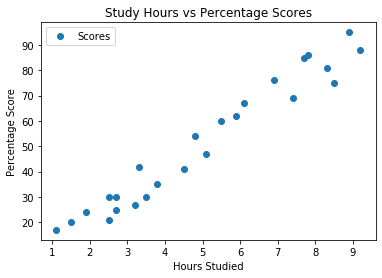

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

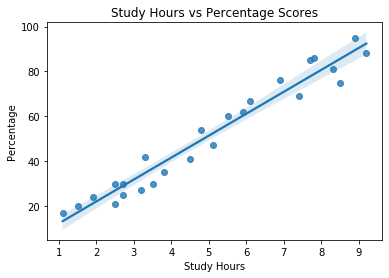

In [7]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()


From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.



# Preparing our data :

In [8]:
##Next is to define our "attributes"(input) variable and "labels"(output)


X = data.iloc[:, :-1].values  #Attribute
y = data.iloc[:, 1].values    #Labels

In [9]:
# Using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


We have the training and testing sets ready for training our model.

# Training the Algorithm :

First I will be making our linear regression algorithm from scratch and then I will compare it with the built-in function sklearn.linear_model.LinearRegression()




# Making the linear regression from scratch :

In [10]:
y_train_new = y_train.reshape(-1,1)  
ones = np.ones([X_train.shape[0], 1]) # create a array containing only ones 
X_train_new = np.concatenate([ones, X_train],1) # concatenate the ones to X matrix


In [11]:
# creating the theta matrix
# notice small alpha value
alpha = 0.01
iters = 5000

theta = np.array([[1.0, 1.0]])
print(theta)

[[1. 1.]]


In [12]:
# Cost Function
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [13]:
computeCost(X_train_new, y_train_new, theta)


1259.1955

The value of 1259.1955 is the initial value. The aim will be to minimise this to as small as possible

In [14]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum(((X @ theta.T) - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        #if i % 10 == 0:
            #print(cost)
    return (theta, cost)

In [15]:
g, cost = gradientDescent(X_train_new, y_train_new, theta, alpha, iters)  
print("Intercept -", g[0][0])
print("Coefficient- ", g[0][1])
print("The final cost obtained after optimisation - ", cost)

Intercept - 2.8268715728809677
Coefficient-  9.682081515927122
The final cost obtained after optimisation -  15.727417763727209


From "1259.1955" to "15.727417763727209" that is a huge decrease in cost.




Now Let's Plot our result

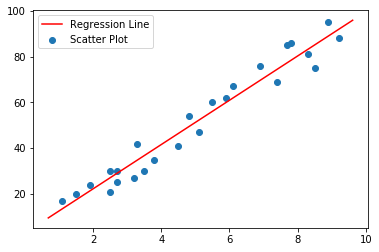

In [16]:
# Plotting scatter points
plt.scatter(X, y, label='Scatter Plot')
axes = plt.gca()

# Plotting the Line
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()


So, the above method was building our regression algorithm from scratch and implementing it on the data-set. However, as you can see this is in crude form, a more elegant would be to make a class of it.

The hyper-parameters such "alpha" also known as the learning rate is optimised by hit and trial method, which should not be the practice.

So, instead of writing this long code, python has an-inbuilt library for the same. Let's try that too.


# Using Scikit-Learn library

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [19]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.68207815]
Intercept -  2.826892353899737


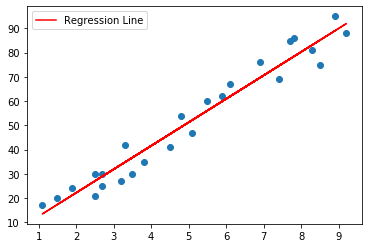

In [20]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()


As we can see that both the graph are identical and even the intercepts and coefficient of the line are same. So my effort of making linear regression algorithm from scratch has been a success!!

But as you can see, it is also pretty easy to use the built-in function. Few lines of code and your work is done.Viola!!

# Making Prediction

Now that we have trained our algorithm, it's time to make some predictions.

In [21]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [23]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9491209376364417
Test Score: 0.9678055545167994


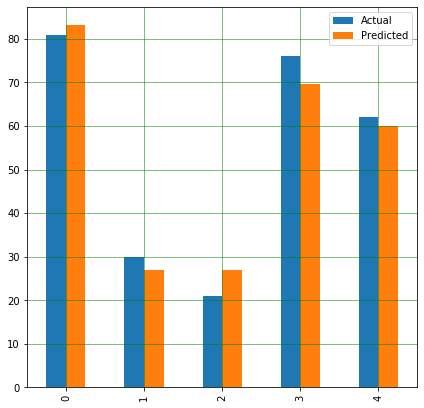

In [24]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [25]:
# Testing with some new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.



In [27]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


R-squared gives the goodness of the fit and as can be seen it is 96.7% which is really good. This means that the algorithm has proven to be good for the given data.

It can also be said that the model's accuracy is 96.78%



# thank you